**Integrantes**
-

- Joel Felipe Alba Acosta (0000296252)
- Mateo  ()

**Librerias**
-

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import stats
from scipy.stats import skew, kurtosis, mode

# **1. Creación de Dataset**

- Se recolectaron los datos de las empresas "most active" el 12 de Febrero del 2025, a las 10:57

In [122]:
data = [
["NVDA","NVIDIA Corporation",189.55,-0.46,"-0.24%","52.004M","180.57M","4.628T","47.04","86.62-212.19","US"],
["F","Ford Motor Comp.",14.10,0.24,"+1.77%","47.927M","58.47M","56.142B","11.62","8.44-14.50","US"],
["FSLY","Fastly, Inc.",15.15,5.84,"+62.73%","39.251M","4.199M","2.277B","--","4.65-12.59","US"],
["AVDL","Avadel Pharmace.",21.64,0.00,"0.00%","34.981M","2.45M","2.124B","--","6.38-23.57","US"],
["RIG","Transocean Ltd.",6.11,0.11,"+1.75%","33.085M","38.809M","6.694B","--","1.97-8.05","US"],
["PLUG","Plug Power Inc.",1.89,-0.07,"-3.33%","30.865M","102.172M","2.623B","--","0.69-4.58","US"],
["NFLX","Netflix, Inc.",75.58,-4.04,"-5.08%","28.661M","46.651M","321.535B","32.20","79.23-134.12","US"],
["INTC","Intel Corporation",47.65,-0.64,"-1.32%","28.05M","104.011M","238.079B","--","17.87-54.60","US"],
["GRAB","Grab Holdings Li.",4.29,0.06,"+1.42%","27.526M","48.424M","17.492B","212.05","3.36-6.62","US"],
["AMZN","Amazon.com, Inc.",198.78,-5.42,"-2.65%","24.993M","46.061M","2.141T","29.11","161.38-258.00","US"],
["CSCO","Cisco Systems, Inc.",76.11,-9.43,"-11.02%","24.223M","22.022M","301.326B","33.51","52.11-88.19","US"],
["MU","Micron Technolog.",424.61,14.27,"+3.48%","19.658M","32.653M","474.783B","36.38","61.54-456.50","US"],
["HOOD","Robinhood Marke.",72.11,-5.96,"-7.63%","19.542M","28.057M","64.867B","36.20","29.68-153.86","US"],
["PLTR","Palantir Technolo.",129.20,-6.48,"-4.78%","18.059M","44.975M","309.144B","226.84","66.12-207.52","US"],
["TSLA","Tesla, Inc.",425.34,-3.27,"-0.76%","18.03M","71.716M","1.603T","386.41","214.25-498.83","US"],
["ONDS","Ondas Inc.",8.96,-0.27,"-2.93%","16.784M","102.533M","3.809B","--","0.57-15.28","US"],
["CLF","Cleveland-Cliffs",11.46,-1.02,"-8.17%","16.74M","16.451M","6.542B","--","5.63-16.70","US"],
["VALE","Vale S.A.",17.63,0.25,"+1.44%","16.719M","36.145M","75.451B","12.38","8.06-17.44","US"],
["T","AT&T Inc.",29.20,0.73,"+2.56%","15.88M","42.368M","206.626B","8.89","22.95-29.79","US"],
["COMP","Compass, Inc.",10.02,-1.18,"-10.49%","15.81M","17.723M","7.189B","--","5.66-13.96","US"],
["NBIS","Nebius Group N.V.",87.45,-1.16,"-1.31%","15.343M","14.965M","21.853B","188.60","18.31-141.10","US"],
["SNAP","Snap Inc.",4.82,-0.17,"-3.40%","14.934M","47.021M","8.208B","--","4.98-11.26","US"],
["U","Unity Software Inc.",20.24,-1.17,"-5.46%","14.886M","12.683M","8.67B","--","15.33-62.15","US"],
["OPEN","Opendoor Technol.",4.39,-0.38,"-7.88%","14.884M","73.888M","4.197B","--","0.61-10.87","US"],
["SHOP","Shopify Inc.",106.90,-12.08,"-10.15%","14.585M","9.645M","139.279B","87.36","69.84-182.19","US"]
]

columns = ["Symbol","Company","Price","Change","Change_%","Volume","Avg_Vol_3M","Market_Cap","PE_TTM","Range_52W","Region"]

df = pd.DataFrame(data, columns=columns)


# **2. Información General del Dataset**

## **2.1 Tamaño Dataset**

In [123]:
shape = df.shape
print(f"El tamaño del dataframe es de {25} filas por {11} columnas")

El tamaño del dataframe es de 25 filas por 11 columnas


## **2.2 Primeros y Últimos Registros**

In [124]:
df.head()

,Symbol,Company,Price,Change,Change_%,Volume,Avg_Vol_3M,Market_Cap,PE_TTM,Range_52W,Region
0,NVDA,NVIDIA Corporation,189.55,-0.46,-0.24%,52.004M,180.57M,4.628T,47.04,86.62-212.19,US
1,F,Ford Motor Comp.,14.10,0.24,+1.77%,47.927M,58.47M,56.142B,11.62,8.44-14.50,US
2,FSLY,"Fastly, Inc.",15.15,5.84,+62.73%,39.251M,4.199M,2.277B,--,4.65-12.59,US
3,AVDL,Avadel Pharmace.,21.64,0.00,0.00%,34.981M,2.45M,2.124B,--,6.38-23.57,US
4,RIG,Transocean Ltd.,6.11,0.11,+1.75%,33.085M,38.809M,6.694B,--,1.97-8.05,US


In [125]:
df.tail()

,Symbol,Company,Price,Change,Change_%,Volume,Avg_Vol_3M,Market_Cap,PE_TTM,Range_52W,Region
20,NBIS,Nebius Group N.V.,87.45,-1.16,-1.31%,15.343M,14.965M,21.853B,188.60,18.31-141.10,US
21,SNAP,Snap Inc.,4.82,-0.17,-3.40%,14.934M,47.021M,8.208B,--,4.98-11.26,US
22,U,Unity Software Inc.,20.24,-1.17,-5.46%,14.886M,12.683M,8.67B,--,15.33-62.15,US
23,OPEN,Opendoor Technol.,4.39,-0.38,-7.88%,14.884M,73.888M,4.197B,--,0.61-10.87,US
24,SHOP,Shopify Inc.,106.90,-12.08,-10.15%,14.585M,9.645M,139.279B,87.36,69.84-182.19,US


## **2.3 Definición y Rol de Variables**

A continuación, se detalla una breve explicación del significado de cada columna:

- **Symbol:** Representa el sticker búrsatil de la compañía
- **Company:** Es el nombre completo de la empresa
- **Price:** Corresponde al precio actual de la acción en USD
- **Change:** Identifica el cambio en USD con respecto al día anterior
- **Change_%:** Expresa el cambio porcentual con respecto al día anterior
- **Volume:** Indica el volumen negociado del día (venta/compra) en millones de acciones
- **AvgVol_3M:** Es el promedio del volumen de los últimos 3 meses
- **MarketCap:** Representa la Capitalización de la empresa en miles de millones
- **PE_TTM:** Price/Earning ratio, mide la relación precio-beneficio.
- **Range_52W:** Rango de precios en 1 año
- **Region**: Ubicación de la empresa


## **2.4 Tipos de Dato de Variables**

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      25 non-null     object 
 1   Company     25 non-null     object 
 2   Price       25 non-null     float64
 3   Change      25 non-null     float64
 4   Change_%    25 non-null     object 
 5   Volume      25 non-null     object 
 6   Avg_Vol_3M  25 non-null     object 
 7   Market_Cap  25 non-null     object 
 8   PE_TTM      25 non-null     object 
 9   Range_52W   25 non-null     object 
 10  Region      25 non-null     object 
dtypes: float64(2), object(9)
memory usage: 2.3+ KB


**Observaciones**

Se prosigue a categorizar cada columna de acuerdo a su tipo de dato

- **Symbol:** Categórica Nominal
- **Company:** Categórica Nominal
- **Price:** Númerica Continua
- **Change:** Númerica Continua
- **Change_%:** Númerica Continua (Requiere transformación)
- **Avg_Vol_3M:** Númerica Continua (Requiere transformación)
- **Market_Cap:** Númerica Continua (Requiere transformación)
- **PE_TTM:** Númerica Continua (Requiere transformación)
- **Range_52W:** Son dos variables en una columna, se puede catalogar como númerica Continua (Requiere transformación)
- **Region:** Categórica Nominal

## **2.5 Descripción de Columnas Númericas**

In [127]:
df.describe()

,Price,Change
count,25.000000,25.000000
mean,80.127200,-1.268000
std,117.927946,4.886143
min,1.890000,-12.080000
25%,10.020000,-3.270000
50%,21.640000,-0.460000
75%,87.450000,0.060000
max,425.340000,14.270000


## **2.6 Valores Únicos por Columna**

In [128]:
for c in df.columns:
    print(f"Columna {c}, Valores Únicos: {df[c].nunique()}")

Columna Symbol, Valores Únicos: 25
Columna Company, Valores Únicos: 25
Columna Price, Valores Únicos: 25
Columna Change, Valores Únicos: 25
Columna Change_%, Valores Únicos: 25
Columna Volume, Valores Únicos: 25
Columna Avg_Vol_3M, Valores Únicos: 25
Columna Market_Cap, Valores Únicos: 25
Columna PE_TTM, Valores Únicos: 15
Columna Range_52W, Valores Únicos: 25
Columna Region, Valores Únicos: 1


**Observaciones**

- La región es la misma para todos las empresas (US).
- El factor de que Symbol y Company posean en todos sus registros valores distintos se explica por el hecho de que corresponden al nombre de la empresa (que debe ser único).
- Las variables restantes son númericas continuas, lo que explica el por qué presentan en todos los registros valores diferentes.

# **3. Transformaciones Elementales de la Data**

## **3.1 Change_%**

In [129]:
df.head()

,Symbol,Company,Price,Change,Change_%,Volume,Avg_Vol_3M,Market_Cap,PE_TTM,Range_52W,Region
0,NVDA,NVIDIA Corporation,189.55,-0.46,-0.24%,52.004M,180.57M,4.628T,47.04,86.62-212.19,US
1,F,Ford Motor Comp.,14.10,0.24,+1.77%,47.927M,58.47M,56.142B,11.62,8.44-14.50,US
2,FSLY,"Fastly, Inc.",15.15,5.84,+62.73%,39.251M,4.199M,2.277B,--,4.65-12.59,US
3,AVDL,Avadel Pharmace.,21.64,0.00,0.00%,34.981M,2.45M,2.124B,--,6.38-23.57,US
4,RIG,Transocean Ltd.,6.11,0.11,+1.75%,33.085M,38.809M,6.694B,--,1.97-8.05,US


### **3.1.1 Quitar el símbolo de Porcentaje**

In [130]:
df['Change_%'] = df['Change_%'].str.replace("%","")

### **3.1.2 Pasar el dato a flotante**

In [131]:
df['Change_%'] = df['Change_%'].astype(float)

## **3.2 Volume**

### **3.2.1 Quitar la M**

In [132]:
df['Volume'] = df['Volume'].str.replace("M","")

### **3.2.2 Cambiar Dato a Flotante**

In [133]:
df['Volume'] = df['Volume'].astype(float)

### **3.2.3 Renombrar Columna**

In [134]:
df = df.rename(columns={"Volume":'Volume_M'})

## **3.3 AvgVol_3M**

### **3.3.1 Quitar la M**

In [135]:
df['Avg_Vol_3M'] = df['Avg_Vol_3M'].str.replace("M","")

### **3.3.2 Convertir a Flotante**

In [136]:
df['Avg_Vol_3M'] = df['Avg_Vol_3M'].astype(float)

### **3.3.3 Cambiar Nombre de Columna**

In [137]:
df = df.rename(columns={"Avg_Vol_3M":'Avg_Vol_3M_M'})

## **3.4 Market_Cap**

### **3.4.1 Extrar la Unidad de Market_Cap a una nueva Columna**

In [138]:
df['Market_Cap_Unit'] = df['Market_Cap'].apply(lambda x: x[-1])
df['Market_Cap'] = df['Market_Cap'].apply(lambda x: x[:-1])

### **3.4.2 Convertir Columna a Flotante**

In [139]:
df['Market_Cap'] = df['Market_Cap'].astype(float)

### **3.4.2 Aplicar la unidad a la Columna**

In [140]:
df["Market_Cap"] = df.apply(
    lambda row: row["Market_Cap"] * 1e9 if row["Market_Cap_Unit"]=="B"
    else row["Market_Cap"] * 1e12 if row["Market_Cap_Unit"]=="T"
    else row["Market_Cap"],
    axis=1
)

## **3.5 PE_TTM**

### **3.5.1 Remplazar "--" por valores nulos**

In [141]:
df['PE_TTM'] = df['PE_TTM'].replace("--",pd.NA)

### **3.5.2 Convertir a Númerico**

In [142]:
df['PE_TTM'] = pd.to_numeric(df['PE_TTM'])

## **3.6 Range_52W**

### **3.6.1 Separación del Rango en dos Columnas**

In [143]:
df['Min_Range_52W'] = df['Range_52W'].apply(lambda x: x.split("-")[0])
df['Max_Range_52W'] = df['Range_52W'].apply(lambda x: x.split("-")[1])

### **3.6.2 Conversión de Columnas de Rango a Flotante**

In [144]:
df['Min_Range_52W'] = df['Min_Range_52W'].astype(float)
df['Max_Range_52W'] = df['Max_Range_52W'].astype(float)

In [145]:
df.head()

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
0,NVDA,NVIDIA Corporation,189.55,-0.46,-0.24,52.004,180.570,4.628000e+12,47.04,86.62-212.19,US,T,86.62,212.19
1,F,Ford Motor Comp.,14.10,0.24,1.77,47.927,58.470,5.614200e+10,11.62,8.44-14.50,US,B,8.44,14.50
2,FSLY,"Fastly, Inc.",15.15,5.84,62.73,39.251,4.199,2.277000e+09,NaN,4.65-12.59,US,B,4.65,12.59
3,AVDL,Avadel Pharmace.,21.64,0.00,0.00,34.981,2.450,2.124000e+09,NaN,6.38-23.57,US,B,6.38,23.57
4,RIG,Transocean Ltd.,6.11,0.11,1.75,33.085,38.809,6.694000e+09,NaN,1.97-8.05,US,B,1.97,8.05


# **4. Análisis Exploratorio Variables Númericas**

In [146]:
def numeric_measures(column):
    results = []

    data = df[column].dropna()
    stats_dict = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Q1": np.quantile(data, 0.25),
        "Q3": np.quantile(data, 0.75),
        "Min": np.min(data),
        "Max": np.max(data),
        "Range": np.max(data) - np.min(data),
        "Variance": np.var(data),  
        "Standard Deviation": np.std(data),
        "Variation Coefficient": (np.std(data)/np.mean(data))*100 if np.mean(data)!=0 else np.nan,
        "Skewness": skew(data),
        "Kurtosis": kurtosis(data)
    }

    return pd.DataFrame([stats_dict])

def plot_numeric_data(column):

    palette = sns.color_palette("Set2", 3)
    colors = np.random.choice(range(len(palette)), 3, replace=False)

    fig, ax = plt.subplots(1, 3, figsize=(16,4))

    sns.histplot(df[column], kde=False, ax=ax[0], color=palette[colors[0]])
    ax[0].set_title(f"Histograma de {column}")
    ax[0].set_xlabel(column)
    ax[0].set_ylabel("Frecuencia")

    sns.boxplot(x=df[column], ax=ax[1], color=palette[colors[1]])
    ax[1].set_title(f"Boxplot de {column}")
    ax[1].set_xlabel(column)
    ax[1].set_ylabel("")

    sns.kdeplot(x=df[column], ax=ax[2], color=palette[colors[2]], linewidth=2)
    ax[2].set_title(f"Densidad (KDE) de {column}")
    ax[2].set_xlabel(column)
    ax[2].set_ylabel("Densidad")

    plt.tight_layout()
    plt.show()

## **4.1 Price**

In [147]:
numeric_measures('Price')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,80.1272,21.64,10.02,87.45,1.89,425.34,423.45,13350.720508,115.545318,144.202366,2.088358,3.49773


**Observaciones**

- El promedio del precio es significativamente mayor a la mediana, indicando la presencia de un sesgo. Del mismo modo, el cuartil 1 expresa que el 75% de las acciones de las empresas poseen acciones a un precio mayor a 10 USD, mientras que el cuartil 3 expresa que existe un 25% de empresas que poseen valores mayores a 87.45 USD por acción.
- El rango expresa una dispersión grande en los precios por acción. Además, la desviación estándar indica que el 66% de las acciones de las empresas están alrededor de mas o menos 115 USD de diferencia del promedio. También, el coeficiente de variación confirma que la variabilidad de las acciones de las empresas con respecto al promedio es alta.
- Existe una asimetría fuerte positiva y la curtosis expresa una alta concentración de datos con respecto a la media y la presencia de colas pesadas.

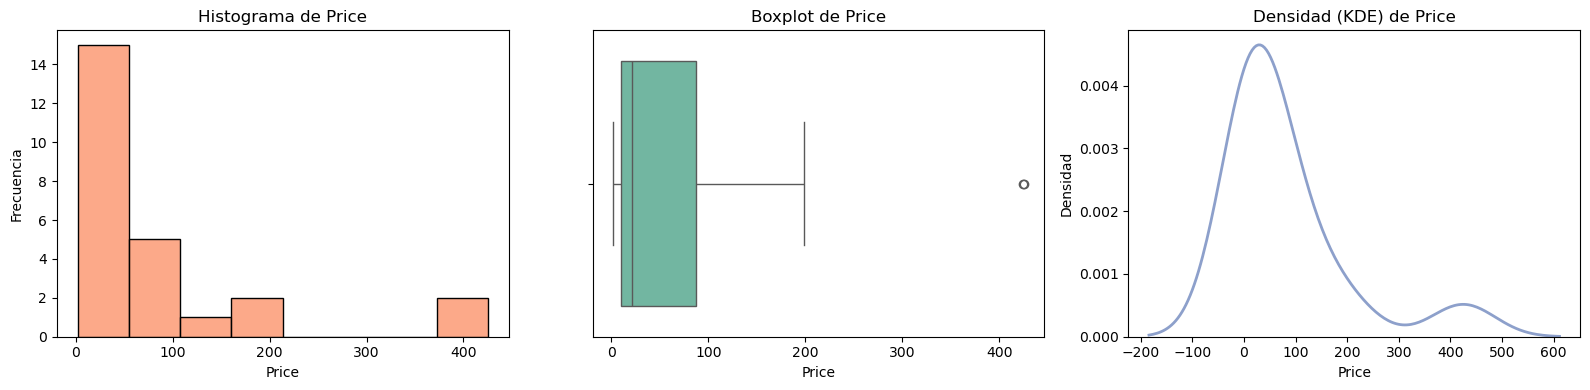

In [148]:
plot_numeric_data('Price')

## **4.2 Change**

In [149]:
numeric_measures('Change')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,-1.268,-0.46,-3.27,0.06,-12.08,14.27,26.35,22.919416,4.787423,-377.556994,0.723428,3.135971


**Observaciones**
- El promedio y la mediana expresan un cambio negativo, lo que indica que existen bastantes empresas que presentaron una devaluación en su acción. Del mismo modo, el cuartil 1 expresa que existe un 25% de las empresas que sufrieron una depreciación de su acción inferior a -3.27 USD y el cuartil 1 expresa que tan solo el 25% de las acciones presentaron una apreciación del valor de su acción mayor a 0.06 USD.
- El rango expresa una alta dispersión en los datos, mostrando una diferencia de 26 USD entre el extremo mayor y menor. Del mismo modo, la desviación estándar expresa una variación de casi 5 dólares con respecto al promedio y el coeficiente de variación expone que dicha variación es alta.
- Las medidas de forma expresan una asimetría positiva moderada y una curtosis alta, donde se evidencia concentración alrededor de la media y la presencia de valores extremos.

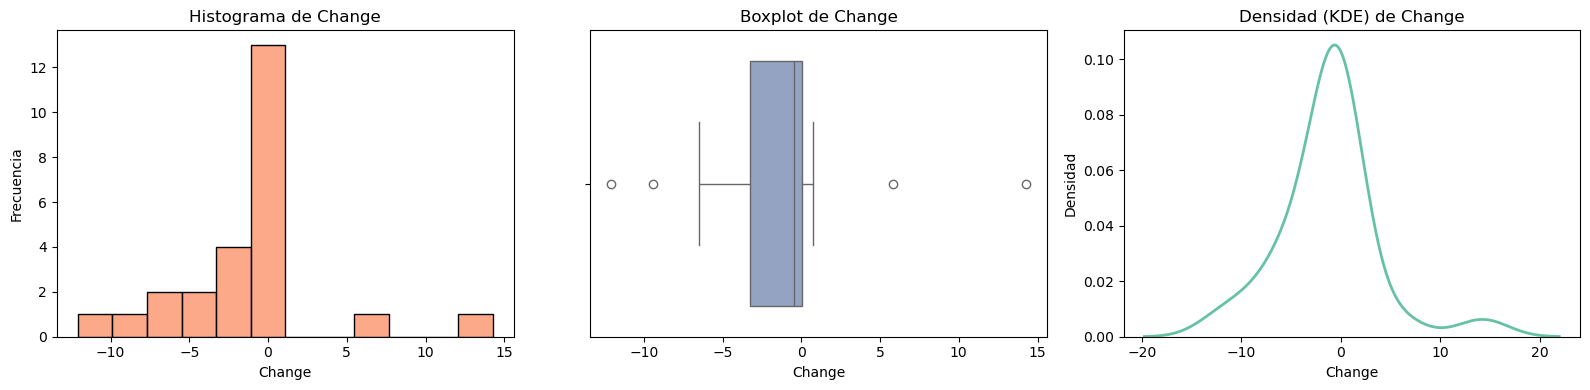

In [150]:
plot_numeric_data('Change')

## **4.3 Volume_M**

In [151]:
numeric_measures('Volume_M')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,24.1368,19.542,15.88,28.661,14.585,52.004,37.419,108.124147,10.398276,43.080591,1.214701,0.615813


**Observaciones**

- El promedio de acciones degociadas es de 24 millones, lo que difere en 5 millones de la media. Del mismo modo, el cuartil 1 expresa que en el 75% de las empresas, se negociaron más de 15.88 millones de acciones, mientras que e, cuartil 3 expresa que existe un 25% de las compañias que presentaron más de 28 millones de acciones negociadas durante el día.
- El rango expresa una alta dispersión en las acciones negociadas. La desviación estándar expresa una diferencia de aproximadamente 10 millones de acciones negociadas con respecto al promedio. El coeficiente de variación es alto, lo que soporta la alta dispersión de los datos.
- Las medidas de forma expresan una asimetría positiva y una curtosis de 0.6, evidenciando una moderada concentración de datos con respecto al promedio y la existencia de valores extremos.

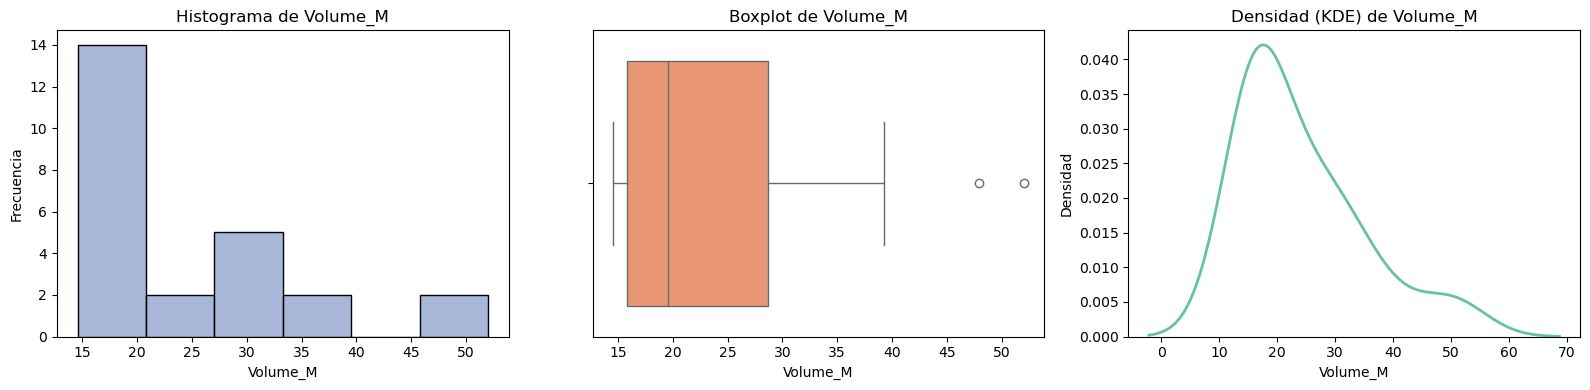

In [152]:
plot_numeric_data('Volume_M')

## **4.4 Change_%**

In [153]:
numeric_measures('Change_%')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,-0.458,-2.65,-5.46,1.42,-11.02,62.73,73.75,184.045512,13.566337,-2962.082414,3.968254,15.875925


**Observaciones**

- El promedio del cambio porcentual de las acciones fue del -0.46%, lo que difere más de 2 unidades de la mediana. El cuartil 1 expresa que el 25% de las empresas presento un cambio porcentual depreciativo inferior al -5.46%, mientras que el cuartil 3 indica que otro 25% de las empresas presento un cambio porcentual apreciativo de la acción superior al 1.42%.
- El rango expresa una alta dispersión del cambio porcentual. También, la desviación estándar expresa una diferencia de mas o menos el 10% con respecto al promedio y el coeficiente de variación es extremadamente alto, evidenciando una alta variación de la data.
- Las medidas de forma expresan una alta asimetría positiva, donde pocas empresas lograron una apreciación con respecto al cambio porcentual. Además, la curtosis expresa una alta concentración de valores alrededor del promedio y la existencia de valores atípicos.

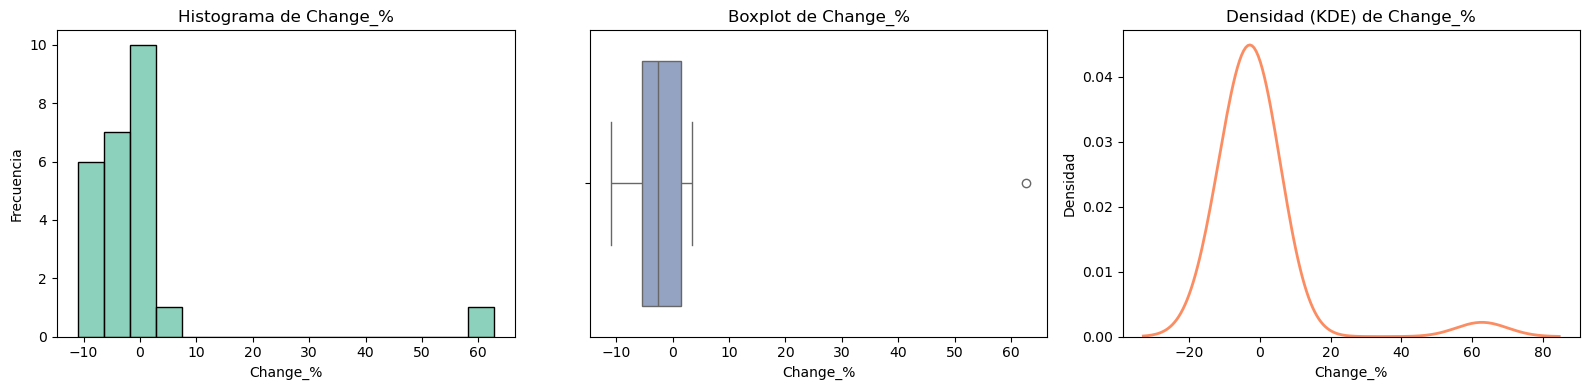

In [154]:
plot_numeric_data('Change_%')

## **4.5 Avg_Vol_3M_M**

In [155]:
numeric_measures('Avg_Vol_3M_M')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,48.18648,42.368,17.723,58.47,2.45,180.57,178.12,1570.306673,39.627095,82.236958,1.562462,2.686487


**Observaciones**

- El promedio difere alrededor de 6 millones de la mediana, expresando un sesgo en el volumen de acciones negociadas. Asimismo, el cuartil 1 expresa que el 75% de las empresas superaron los 17.72 millones de acciones negociadas en promedio durante los últimos 3 meses. También, el cuartil 3 evidencia que existe un 25% de las empresas que supero los 58.47 millones de acciones negociadas en promedio en el transcurso de los últimos 3 meses.
- El rango expresa una amplia dispersión de los datos, lo que se evidencia en la desviación estándar, donde existe una variación de casi 40 millones de acciones negociadas con respecto al promedio. Del mismo modo, el coeficiente de variación es elevado, confirmando una alta dispersión de las acciones negociadas en los últimos 3 meses con respecto al promedio.
- Las medidas de forma expresan una asimetría positiva y una curtosis elevada, afirmando la presencia de agrupamiento de datos cerca del promedio y la presencia de valores extremos.

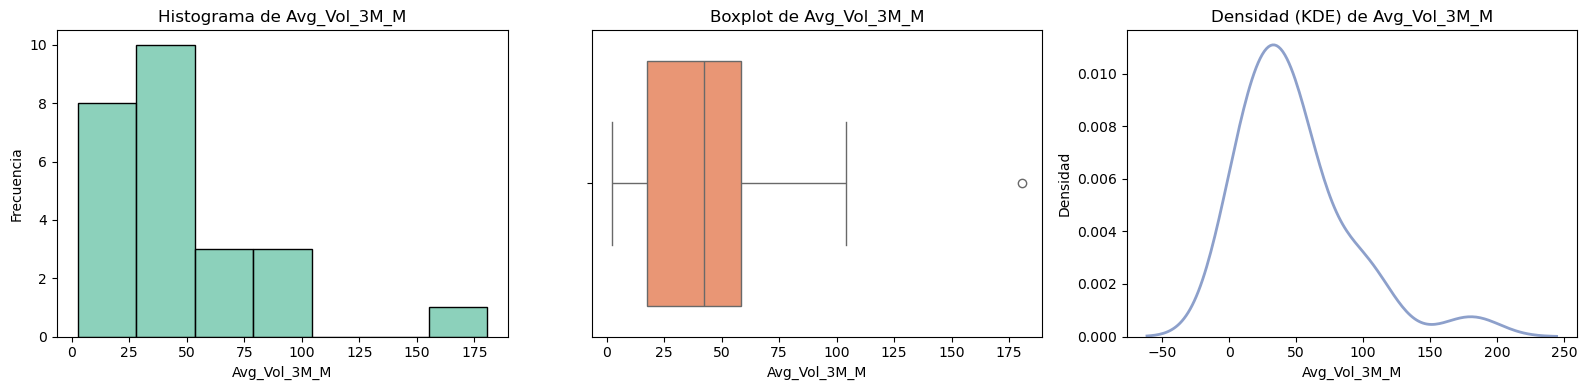

In [156]:
plot_numeric_data('Avg_Vol_3M_M')

## **4.6 Market_Cap**

In [157]:
numeric_measures('Market_Cap')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,4.260364e+11,5.614200e+10,6.694000e+09,3.013260e+11,2.124000e+09,4.628000e+12,4.625876e+12,9.872924e+23,9.936259e+11,233.225588,3.253851,10.244503


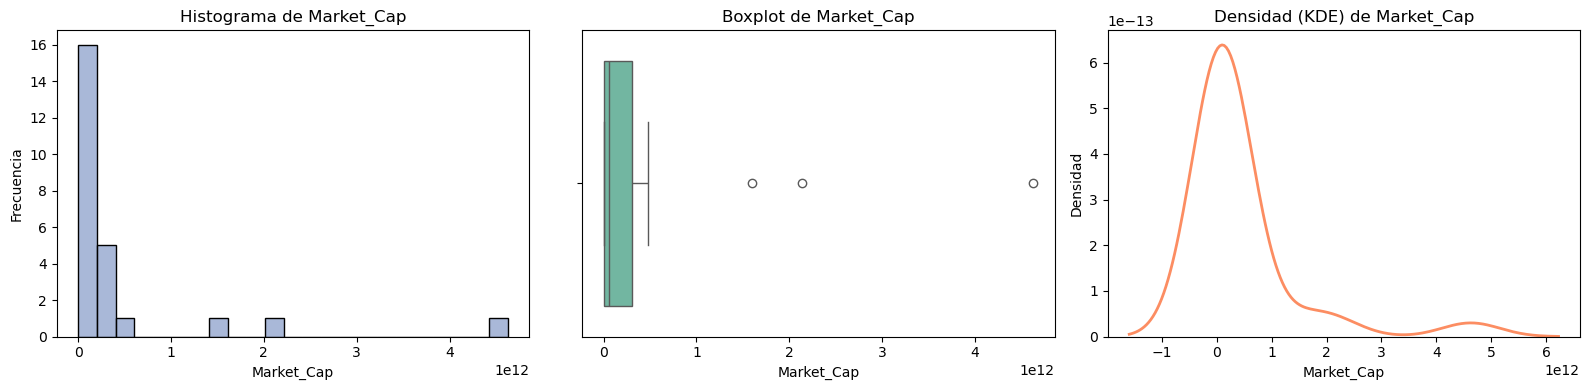

In [158]:
plot_numeric_data('Market_Cap')

**Observaciones**
- El promedio difiere extremadamente de la media, por un orden de diferencia. El cuartil 1 expresa que el 25% de las empresas posee un valor inferior a 6.66 billones de dólares, mientras que el cuartil 3 indica que un 25% de las empresas posee una valoración superior a los 300 billones de dólares.
- El rango manifiesta una dispersión extremadamente alta. La desviación estándar y el coeficiente de variación son demasiado elevados, indicando una alta dispersión en los datos.
- Las medidas de forma expresan una asimetría fuerte positiva y una alta concentración de los datos alrededor del promedio y la presencia de valores extremos.

## **4.7 PE_TTM**

In [159]:
numeric_measures('PE_TTM')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,96.327857,36.29,29.8825,163.29,8.89,386.41,377.52,11946.457145,109.29985,113.466502,1.407604,0.937432


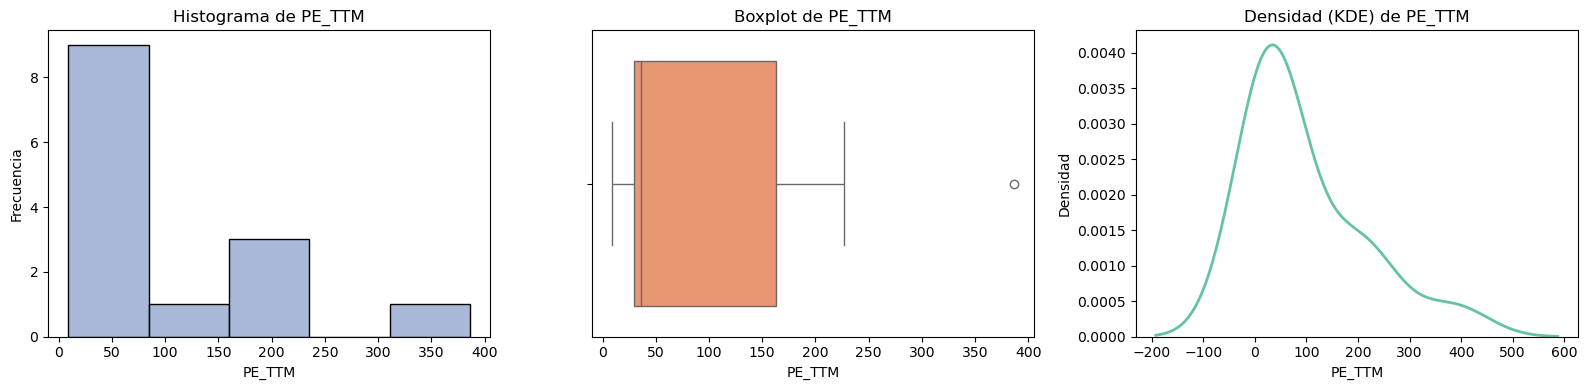

In [161]:
plot_numeric_data('PE_TTM')

**Observaciones**
- El promedio del PE_TTM es de 96.32 y la mediana difere bastante de la media, estas medidas son grandes, indicando que las empresas están creciendo. El cuartil 1 expresa que el 25% de las empresas (que poseen esta variable), tienen un P/E mayor a 30 aproximadamente, expresando un crecimiento y que el mercado paga por lo menos 30 veces las ganancias anuales de la empresa.
- Existen 11 empresas que empresan la falta de existencia de estos valores, lo que indica que la entidad no está generando ganancias, sino pérdidas, o en su defecto, están invirtiendo sus utilidades nuevamente en la empresa, por lo que no está generando ganancias al accionista.
- El rango es extremadamente elevado, mientras que la desviación estándar evidencia una diferencia de 109 con respecto al promedio y el coeficiente de variación es alto, expresando una alta variabilidad de los datos con respecto al promedio.
- Las medidas de forma expresan una asimetría fuerte positiva, la curtosis es cercana a 1, evidenciando una concentración moderada-fuerte de los datos con respecto al promedio y la presencia de valores extremos.

## **4.8 Min_Range_52W**

In [162]:
numeric_measures('Min_Range_52W')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,37.8492,15.33,4.98,61.54,0.57,214.25,213.68,2730.625871,52.255391,138.062075,2.000968,3.589189


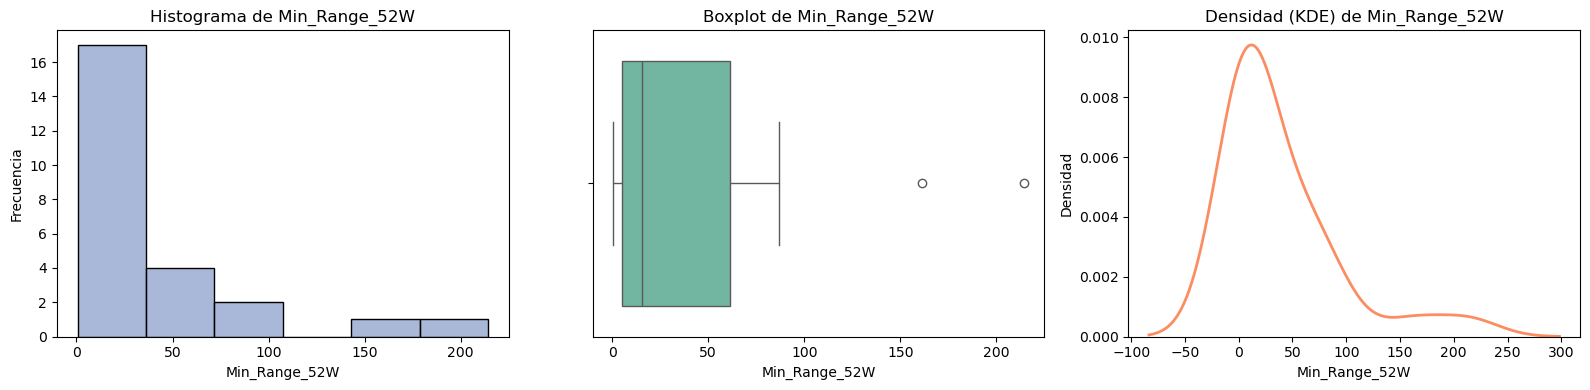

In [163]:
plot_numeric_data('Min_Range_52W')

## **4.9 Max_Range_52W**

In [164]:
numeric_measures('Max_Range_52W')

,Mean,Median,Q1,Q3,Min,Max,Range,Variance,Standard Deviation,Variation Coefficient,Skewness,Kurtosis
0,105.3784,29.79,13.96,153.86,4.58,498.83,494.25,17873.760917,133.692786,126.86925,1.681736,2.123691


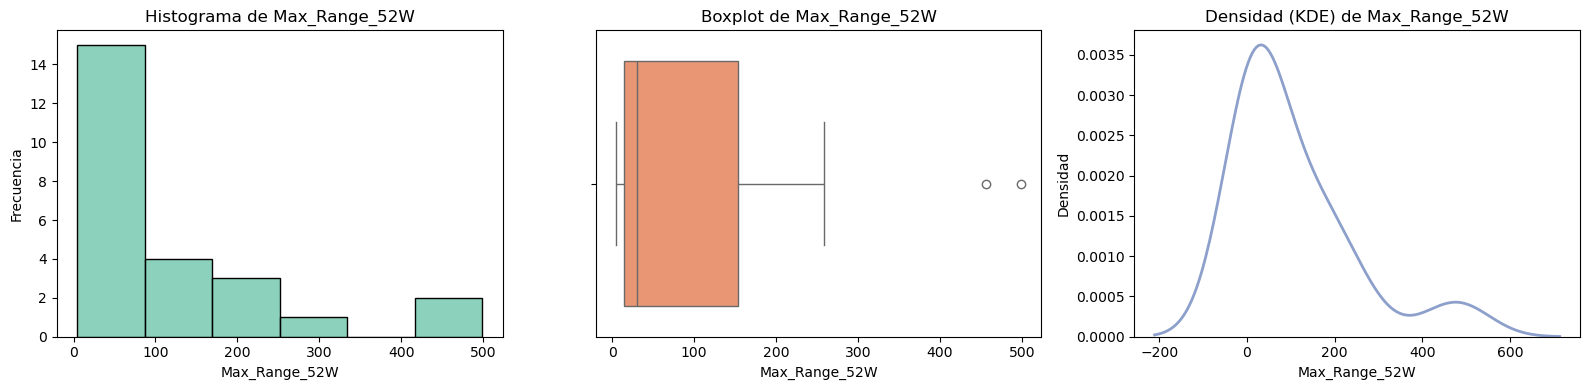

In [165]:
plot_numeric_data('Max_Range_52W')

# **5. Análisis de Outliers**

In [166]:
def tukey_outliers(column):
    data = df[column]
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers


## **5.1 Price**

In [167]:
tukey_outliers('Price')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
11,MU,Micron Technolog.,424.61,14.27,3.48,19.658,32.653,4.747830e+11,36.38,61.54-456.50,US,B,61.54,456.50
14,TSLA,"Tesla, Inc.",425.34,-3.27,-0.76,18.030,71.716,1.603000e+12,386.41,214.25-498.83,US,T,214.25,498.83


## **5.2 Change**

In [168]:
tukey_outliers('Change')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
2,FSLY,"Fastly, Inc.",15.15,5.84,62.73,39.251,4.199,2.277000e+09,NaN,4.65-12.59,US,B,4.65,12.59
10,CSCO,"Cisco Systems, Inc.",76.11,-9.43,-11.02,24.223,22.022,3.013260e+11,33.51,52.11-88.19,US,B,52.11,88.19
11,MU,Micron Technolog.,424.61,14.27,3.48,19.658,32.653,4.747830e+11,36.38,61.54-456.50,US,B,61.54,456.50
24,SHOP,Shopify Inc.,106.90,-12.08,-10.15,14.585,9.645,1.392790e+11,87.36,69.84-182.19,US,B,69.84,182.19


## **5.3 Change_%**

In [169]:
tukey_outliers('Change_%')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
2,FSLY,"Fastly, Inc.",15.15,5.84,62.73,39.251,4.199,2.277000e+09,NaN,4.65-12.59,US,B,4.65,12.59


## **5.4 Volume_M**

In [170]:
tukey_outliers('Volume_M')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
0,NVDA,NVIDIA Corporation,189.55,-0.46,-0.24,52.004,180.57,4.628000e+12,47.04,86.62-212.19,US,T,86.62,212.19
1,F,Ford Motor Comp.,14.10,0.24,1.77,47.927,58.47,5.614200e+10,11.62,8.44-14.50,US,B,8.44,14.50


## **5.5 Avg_Vol_3M_M**

In [171]:
tukey_outliers('Avg_Vol_3M_M')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
0,NVDA,NVIDIA Corporation,189.55,-0.46,-0.24,52.004,180.57,4.628000e+12,47.04,86.62-212.19,US,T,86.62,212.19


## **5.6 Market_Cap**

In [172]:
tukey_outliers('Market_Cap')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
0,NVDA,NVIDIA Corporation,189.55,-0.46,-0.24,52.004,180.570,4.628000e+12,47.04,86.62-212.19,US,T,86.62,212.19
9,AMZN,"Amazon.com, Inc.",198.78,-5.42,-2.65,24.993,46.061,2.141000e+12,29.11,161.38-258.00,US,T,161.38,258.00
14,TSLA,"Tesla, Inc.",425.34,-3.27,-0.76,18.030,71.716,1.603000e+12,386.41,214.25-498.83,US,T,214.25,498.83


## **5.7 PE_TTM**

In [173]:
tukey_outliers('PE_TTM')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W


**Observaciones**
- Muchas empresas aca tienen np.nan, lo que indica que sus utilidades son negativas o cero. Recordar hablar de esto aca!!.

## **5.8 Min_Range_52W**

In [174]:
tukey_outliers('Min_Range_52W')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
9,AMZN,"Amazon.com, Inc.",198.78,-5.42,-2.65,24.993,46.061,2.141000e+12,29.11,161.38-258.00,US,T,161.38,258.00
14,TSLA,"Tesla, Inc.",425.34,-3.27,-0.76,18.030,71.716,1.603000e+12,386.41,214.25-498.83,US,T,214.25,498.83


## **5.9 Max_Range_52W**

In [175]:
tukey_outliers('Max_Range_52W')

,Symbol,Company,Price,Change,Change_%,Volume_M,Avg_Vol_3M_M,Market_Cap,PE_TTM,Range_52W,Region,Market_Cap_Unit,Min_Range_52W,Max_Range_52W
11,MU,Micron Technolog.,424.61,14.27,3.48,19.658,32.653,4.747830e+11,36.38,61.54-456.50,US,B,61.54,456.50
14,TSLA,"Tesla, Inc.",425.34,-3.27,-0.76,18.030,71.716,1.603000e+12,386.41,214.25-498.83,US,T,214.25,498.83


# **6. Análisis Profundo de Volume**

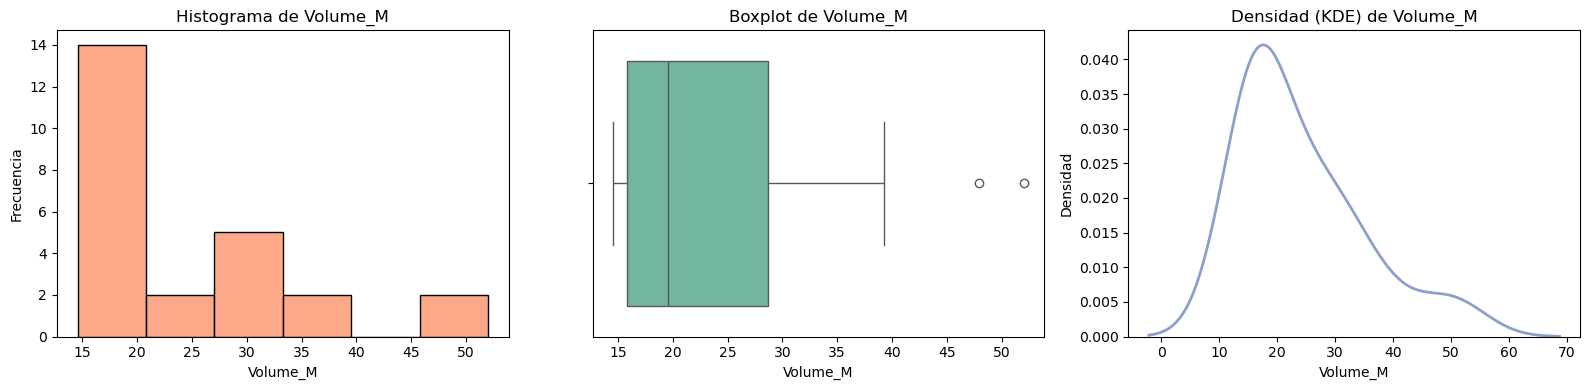

In [176]:
plot_numeric_data('Volume_M')

In [179]:
df[['Market_Cap','Volume_M','Price','Change','PE_TTM']].corr()

,Market_Cap,Volume_M,Price,Change,PE_TTM
Market_Cap,1.000000,0.451154,0.509224,-0.058157,0.018488
Volume_M,0.451154,1.000000,-0.047131,0.185958,-0.275298
Price,0.509224,-0.047131,1.000000,0.173309,0.397031
Change,-0.058157,0.185958,0.173309,1.000000,-0.125993
PE_TTM,0.018488,-0.275298,0.397031,-0.125993,1.000000


# **7. Conclusiones y Recomendaciones**